<a href="https://colab.research.google.com/github/PALAK0902/PALAK0902/blob/main/tcs_internship_PALAK009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STEP 3 - PROCESSING OF DATA **

In [ ]:
from __future__ import division
import numpy as np
import os
import glob
from random import *
from PIL import Image
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
# %matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda, ELU, Activation, BatchNormalization
from keras.layers.convolutional import Convolution2D, Cropping2D, ZeroPadding2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam, RMSprop
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
d = {}
from subprocess import check_output
with open('https://drive.google.com/file/d/1VNxRlaZSeNW7a5DjwnqIYk4HVWGDEF6M/view?usp=sharing') as f:
  for line in f:
    key = line.split(' ')[0]
    writer = line.split(' ')[1]
    d[key] = writer
print(len(d.keys()))

FileNotFoundError: ignored

In [ ]:
tmp = []
target_list = []
path_to_files = os.path.join('https://drive.google.com/drive/folders/1Vg8wmQ93drKVN81luCiHwObHuDC3N00S?usp=sharing','*')
for filename in sorted(glob.glob(path_to_files)):    
    tmp.append(filename)
    image_name = filename.split('/')[-1]
    file, ext = os.path.splitext(image_name)
    parts = file.split('-')
    #print(parts)
    form = parts[0] + '-' + parts[1]
    
    for key in d:
        if key == form:
            target_list.append(str(d[form]))

img_files = np.asarray(tmp)
img_targets = np.asarray(target_list)
print(img_files)
print(img_targets)

https://drive.google.com/file/d/1FhKYRDP3Qeut2wUwyOgqvvaDiSYY0oeC/view?usp=sharing
https://drive.google.com/file/d/1M-EOX2QrbF9iOo5-7YGRlbdyKqTU4oxD/view?usp=sharing
https://drive.google.com/file/d/181Td0_kYQcDVJ9uZEWWf5_4wq8LsOaFG/view?usp=sharing
https://drive.google.com/file/d/1flE54selZXJroSKTALdDZi2aiqOdEgt8/view?usp=sharing

In [ ]:
# Visualizing the data
for filename in img_files[6:15]:
    img=mpimg.imread(filename)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap ='gray')

![line.png](

In [ ]:
# Label Encode writer names for one hot encoding later
encoder = LabelEncoder()
encoder.fit(img_targets)
encoded_Y = encoder.transform(img_targets)

print(img_files[6:15], img_targets[6:15], encoded_Y[6:15])

https://drive.google.com/file/d/1m8uIT5Cym3mA5wPw8Ll_jsphsNbJJ1Ez/view?usp=sharing
https://drive.google.com/file/d/1NaLeH52euvr5HlLqHEmRmrodR1z1GBVR/view?usp=sharing
https://drive.google.com/file/d/1lRSVEsMtIt1POG83sAyknraSBEYYaLQI/view?usp=sharing'https://drive.google.com/file/d/1LkI5osBakwg8LkYc80SiC9hKdRQeSSHo/view?usp=sharing



**Step 4: Dividing the dataset into train, test and validation sets**.

After sptlitting we have 3240 train images, 835 test and validation images each.

In [ ]:
#split into test train and validation in ratio 4:1:1

from sklearn.model_selection import train_test_split
train_files, rem_files, train_targets, rem_targets = train_test_split(
        img_files, encoded_Y, train_size=0.55, random_state=30, shuffle= True)

validation_files, test_files, validation_targets, test_targets = train_test_split(
        rem_files, rem_targets, train_size=0.5, random_state=22, shuffle=True)

print(train_files.shape, validation_files.shape, test_files.shape)
print(train_targets.shape, validation_targets.shape, test_targets.shape)

(3233,) (833,) (833,)
(3233,) (833,) (833,)

(3233,) (833,) (833,)
(3233,) (833,) (833,)


In [ ]:
batch_size = 16
num_classes = 50


def generate_data(samples, target_files,  batch_size=batch_size, factor = 0.1 ):
    num_samples = len(samples)
    from sklearn.utils import shuffle
    while 1: # Loop forever so the generator never terminates
 
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_targets = target_files[offset:offset+batch_size]

            images = []
            targets = []
            for i in range(len(batch_samples)):
                batch_sample = batch_samples[i]
                batch_target = batch_targets[i]
                im = Image.open(batch_sample)
                cur_width = im.size[0]
                cur_height = im.size[1]

                
                height_fac = 113 / cur_height

                new_width = int(cur_width * height_fac)
                size = new_width, 113

                imresize = im.resize((size), Image.ANTIALIAS)  
                now_width = imresize.size[0]
                now_height = imresize.size[1]
                

                avail_x_points = list(range(0, now_width - 113 ))

            
                pick_num = int(len(avail_x_points)*factor)

              
                random_startx = sample(avail_x_points,  pick_num)

                for start in random_startx:
                    imcrop = imresize.crop((start, 0, start+113, 113))
                    images.append(np.asarray(imcrop))
                    targets.append(batch_target)

            
            X_train = np.array(images)
            y_train = np.array(targets)

           
            X_train = X_train.reshape(X_train.shape[0], 113, 113, 1)
           
            X_train = X_train.astype('float32')
            X_train /= 255

         
            y_train = to_categorical(y_train, num_classes)

            yield shuffle(X_train, y_train)

In [ ]:
# Generate data for training and validation
train_generator = generate_data(train_test_split, train_targets, batch_size=batch_size, factor = 0.3)
validation_generator = generate_data(validation_files, validation_targets, batch_size=batch_size, factor = 0.3)
test_generator = generate_data(test_files, test_targets, batch_size=batch_size, factor = 0.1)

### **Step 5: Creating the defining the model/network architecture**.
Adding the Pooling Layers, CNN Layers, Activation Functions, etc.

In [ ]:
def resize_image(image):
    import tensorflow as tf
    return tf.image.resize_images(image,[56,56])


row, col, ch = 113, 113, 1

model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(row, col, ch)))


#model.add(Lambda(resize_image)) 
#model.add(Lambda(lambda x: resize_image))


model.add(Convolution2D(filters= 32, kernel_size =(5,5), strides= (2,2), padding='same', name='conv1')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool1'))

model.add(Convolution2D(filters= 64, kernel_size =(3,3), strides= (1,1), padding='same', name='conv2'))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool2'))

model.add(Convolution2D(filters= 128, kernel_size =(3,3), strides= (1,1), padding='same', name='conv3')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2), name='pool3'))


model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512, name='dense1'))  

model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256, name='dense2'))  
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes,name='output'))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
zero_padding2d (ZeroPadding2 (None, 115, 115, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 58, 58, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense1 (Dense)               (None, 512)               3211776   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               131328    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 50)                12850     
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
=================================================================
Total params: 3,449,138
Trainable params: 3,449,138
Non-trainable params: 0
_________________________________________________________________
None

## **Step 6: Training the model**.
Using 4 epochs of 3000 train samples and 280 val samples

In [ ]:
# Training the model 

nb_epoch = 4

samples_per_epoch = 3000
nb_val_samples = 280



from keras.callbacks import ModelCheckpoint
filepath="gdrive/My Drive/check-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath= filepath, verbose=1, save_best_only=False)
callbacks_list = [checkpoint]


history_object = model.fit_generator(train_generator, samples_per_epoch= samples_per_epoch,
                                     validation_data=validation_generator,
                                     nb_val_samples=nb_val_samples, nb_epoch=nb_epoch, verbose=1, callbacks=callbacks_list)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=3000, epochs=4, validation_steps=280)`
Epoch 1/4
3000/3000 [==============================] - 2754s 918ms/step - loss: 1.5004 - accuracy: 0.5691 - val_loss: 0.7522 - val_accuracy: 0.8088

Epoch 00001: saving model to gdrive/My Drive/check-01-0.7522.hdf5
Epoch 2/4
3000/3000 [==============================] - 1733s 578ms/step - loss: 0.5590 - accuracy: 0.8275 - val_loss: 0.3776 - val_accuracy: 0.8817

Epoch 00002: saving model to gdrive/My Drive/check-02-0.3776.hdf5
Epoch 3/4
3000/3000 [==============================] - 1740s 580ms/step - loss: 0.3559 - accuracy: 0.8892 - val_loss: 0.5537 - val_accuracy: 0.8952

Epoch 00003: saving model to gdrive/My Drive/check-03-0.5537.hdf5
Epoch 4/4
3000/3000 [==============================] - 1779s 593ms/step - loss: 0.2617 - accuracy: 0.9183 - val_loss: 0.1937 - val_accuracy: 0.9197

Epoch 00004: saving model to gdrive/My Drive/check-04-0.1937.hdf5

## **Step 7: Saving the model**.
Saving the model using HDF5 file extension

In [ ]:

#Saving the model and weights into GDrive

from keras.models import model_from_json   
# serialize model to JSON
model_json = model.to_json()
with open("gdrive/My Drive/TCS Internship/Model/HTR_Model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("gdrive/My Drive/TCS Internship/Model/HTR_model_weights.hdf5")
print("Saved model to GDrive")

Saved model to GDrive

In [ ]:
#Loading json and weights to recover model
import tensorflow as tf
json_file = open("https://drive.google.com/drive/folders/1jTK1mPgJqy75Th_apkwusACNE54OTUjv?usp=sharing", 'r')
loaded_model_json = json_file.read()
json_file.close()
l_model = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
l_model.load_weights("gdrive/My Drive/TCS Internship/Model/HTR_model_weights.hdf5")
print("Loaded model from Gdrive")

FileNotFoundError: ignored

In [ ]:
model.save("")
print("Saved Keras Model")

NameError: ignored

In [ ]:
#from keras.models import load_model
# load model
from tensorflow import keras
loaded_model = keras.models.load_model("gdrive/My Drive/TCS Internship/Model/HTR_model.hdf5", custom_objects=None, compile=True, options=None)
print("Loaded the Keras Model")

In [ ]:
print(loaded_model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
zero_padding2d (ZeroPadding2 (None, 115, 115, 1)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 58, 58, 32)        832       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 32)        0         
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 29, 29, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 29, 29, 64)        0         
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 14, 14, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6272)              0         
_________________________________________________________________
dense1 (Dense)               (None, 512)               3211776   
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               131328    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 50)                12850     
_________________________________________________________________
activation_5 (Activation)    (None, 50)                0         
=================================================================
Total params: 3,449,138
Trainable params: 3,449,138
Non-trainable params: 0
_________________________________________________________________
None

### **Step 8: Testing the model.**

In [ ]:
#model.load_weights('gdrive/My Drive/check-04-0.2584.hdf5')
scores = model.evaluate_generator(test_generator,280) 
print("Accuracy = ", scores[1])

Accuracy =  0.9174939393997192

### **Step 9: Prediction**.
Prediction being done on Test Files

In [ ]:
images = []
for filename in test_files[:50]:
    im = Image.open(filename)
    cur_width = im.size[0]
    cur_height = im.size[1]

   
    height_fac = 113 / cur_height

    new_width = int(cur_width * height_fac)
    size = new_width, 113

    imresize = im.resize((size), Image.ANTIALIAS)  
    now_width = imresize.size[0]
    now_height = imresize.size[1]


    avail_x_points = list(range(0, now_width - 113 ))

    
    factor = 0.1
    pick_num = int(len(avail_x_points)*factor)
    
    random_startx = sample(avail_x_points,  pick_num)

    for start in random_startx:
        imcrop = imresize.crop((start, 0, start+113, 113))
        images.append(np.asarray(imcrop))
        
    X_test = np.array(images)
    
    X_test = X_test.reshape(X_test.shape[0], 113, 113, 1)
   
    X_test = X_test.astype('float32')
    X_test /= 255
    shuffle(X_test)

print(X_test.shape)

(6264, 113, 113, 1)

In [ ]:
predictions = loaded_model.predict(X_test, verbose =1)

print(predictions.shape)
predicted_writer = []
for pred in predictions:
    predicted_writer.append(np.argmax(pred))
print(len(predicted_writer))

196/196 [==============================] - 1s 5ms/step

(6264, 50)

6264

In [ ]:
writer_number = 18
total_images =10
counter = 0
for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
        image = X_test[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap ='gray')

In [ ]:
writer_number = 18
total_images =10
counter = 0
print("Anirudh Goel")
for i in range(len(predicted_writer)//10):
    if predicted_writer[i] == writer_number:
        image = X_test[i].squeeze()
        plt.figure(figsize=(2,2))
        plt.imshow(image, cmap ='gray')
        plt.show()

### **Step 10: Plotting the loss and accuracy plots**.

In [ ]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [ ]:
cc = history_object.history['accuracy']
val_acc = history_object.history['val_accuracy']
loss = history_object.history['loss']
val_loss = history_object.history['val_loss']
epochs = range(1,len(loss)+1)

### **Loss vs Epochs Graph**
It shows deacrease in loss over epochs


### **Loss vs Epochs Graph**
It shows deacrease in loss over epochs.

In [ ]:
plotgraph(epochs, loss, val_loss)

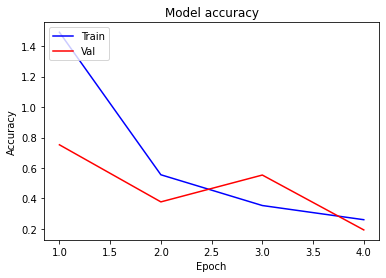


### **Accuracy vs Epochs Graph**
It shows increase in accuracy over epochs.

In [ ]:
plotgraph(epochs, acc, val_acc)

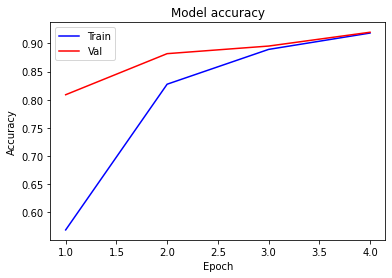